In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Завантажити дані, вивести на екран назви колонок і розмір датасета

In [2]:
raw_data = pd.read_csv('heart.csv')

In [3]:
print(raw_data.columns)
print(raw_data.shape)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
(303, 14)


# Опрацювати пропуски (по можливості заповнити їх або видалити)

In [4]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)# 

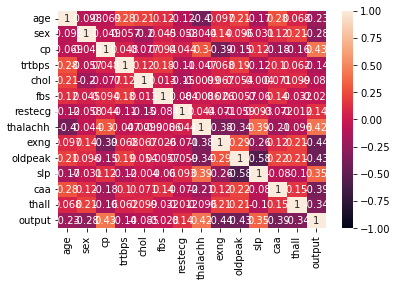

In [5]:
sns.heatmap(raw_data.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

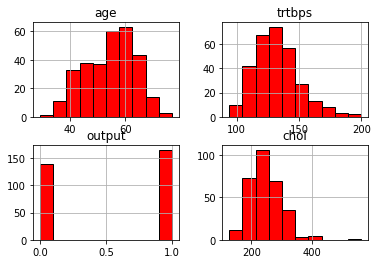

In [6]:
col = ['age', 'trtbps', 'output', 'chol']
raw_data.loc[:,col].hist(color='red', edgecolor='black')
plt.show()

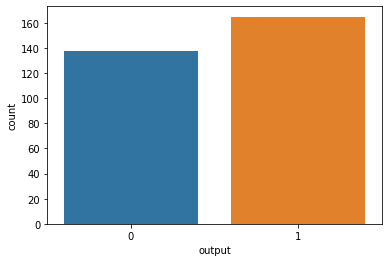

In [7]:
sns.countplot(x='output', data=raw_data)
plt.show()

<AxesSubplot:xlabel='output', ylabel='age'>

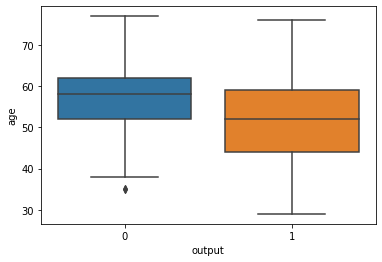

In [8]:
sns.boxplot(x=raw_data["output"],y=raw_data["age"])

<AxesSubplot:xlabel='output', ylabel='trtbps'>

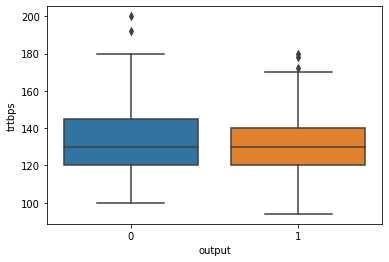

In [9]:
sns.boxplot(x=raw_data["output"],y=raw_data["trtbps"])

# Нормалізувати дані

In [10]:
scaler = StandardScaler()
scaler.fit(raw_data.drop('output', axis=1))
scaled_features = scaler.transform(raw_data.drop('output', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('output', axis=1).columns)
x = scaled_data
y = raw_data['output']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)
scaled_X_train = scaler.transform(x_training_data) 
scaled_X_test = scaler.transform(x_test_data)

# kNN оптимальний парметр

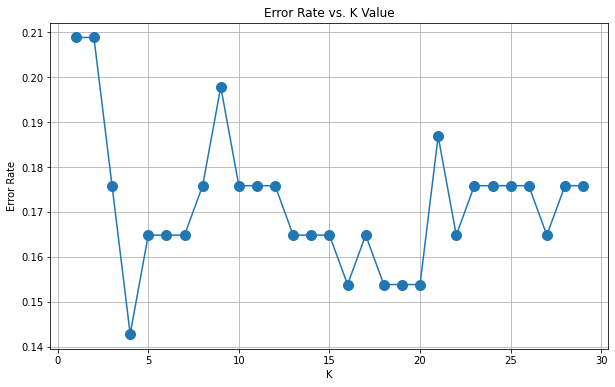

In [11]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_training_data)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test_data))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

# kNN

In [12]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(scaled_X_train, y_training_data)
predictions = model.predict(scaled_X_test)
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data,predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[33  8]
 [ 8 42]]


# Дерево прийняття рішень і візуалізувати його

In [13]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(scaled_X_train, y_training_data)
predictions1 = model1.predict(scaled_X_test)
print(classification_report(y_test_data, predictions1))
print(confusion_matrix(y_test_data,predictions1))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.77      0.80      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29 12]
 [10 40]]


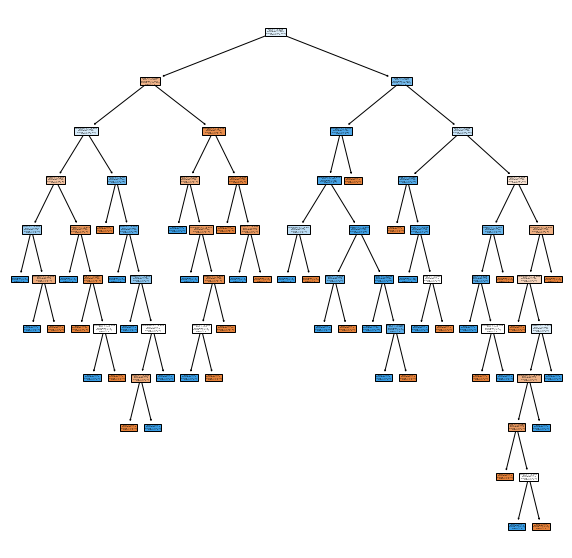

In [14]:
plt.figure(figsize = (10, 10))
tree.plot_tree(model1, feature_names = x_training_data.columns, class_names= ['1', '0'], filled = True)
plt.show()

# SVM

In [15]:
model2 = SVC(C=1, gamma = 0.01, kernel = 'rbf')
model2.fit(scaled_X_train,y_training_data)
predictions2 = model2.predict(scaled_X_test)
print(classification_report(y_test_data, predictions2))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.87      0.96      0.91        50

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.91      0.90      0.90        91



# Для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

In [16]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_training_data)
print(grid.best_params_)
grid_predictions = grid.predict(scaled_X_test)
print(classification_report(y_test_data,grid_predictions))
print(confusion_matrix(y_test_data,grid_predictions))

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.73      0.83        41
           1       0.82      0.98      0.89        50

    accuracy                           0.87        91
   macro avg       0.89      0.86      0.86        91
weighted avg       0.88      0.87      0.86        91

[[30 11]
 [ 1 49]]


# Random Forest

In [17]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(scaled_X_train,y_training_data)
predictions4 = model4.predict(scaled_X_test)
print(classification_report(y_test_data, predictions4))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.87      0.94      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91



# За допомогою GridSearch підібрати оптимальні параметри для Random Forest

In [18]:
param_grid2 = {'criterion': ["entropy","gini"],'max_depth' : [2, 5, 10, 20, None],}
gridForest = GridSearchCV(RandomForestClassifier(), param_grid2, n_jobs=-1)
gridForest.fit(scaled_X_train, y_training_data)
print(gridForest.best_params_)
grid_predictions2 = gridForest.predict(scaled_X_test)
print(classification_report(y_test_data,grid_predictions2))
print(confusion_matrix(y_test_data,grid_predictions2))

{'criterion': 'entropy', 'max_depth': 2}
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        41
           1       0.86      1.00      0.93        50

    accuracy                           0.91        91
   macro avg       0.93      0.90      0.91        91
weighted avg       0.92      0.91      0.91        91

[[33  8]
 [ 0 50]]


# AdaBoost

In [19]:
model3 = AdaBoostClassifier(n_estimators=100, random_state=0)
model3.fit(scaled_X_train,y_training_data)
predictions3 = model3.predict(scaled_X_test)
print(classification_report(y_test_data, predictions3))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        41
           1       0.81      0.94      0.87        50

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.85      0.85      0.84        91



# За допомогою GridSearch підібрати оптимальні параметри для AdaBoost

In [20]:
param_grid1 = {'n_estimators': [100, 200, 300, 400], 'learning_rate' : [0.01,0.05,0.1,0.3,1],}
gridAdaBoost = GridSearchCV(AdaBoostClassifier(), param_grid1, n_jobs=-1)
gridAdaBoost.fit(scaled_X_train, y_training_data)
print(gridAdaBoost.best_params_)
grid_predictions1 = gridAdaBoost.predict(scaled_X_test)
print(classification_report(y_test_data,grid_predictions1))
print(confusion_matrix(y_test_data,grid_predictions1))

{'learning_rate': 0.1, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.97      0.76      0.85        41
           1       0.83      0.98      0.90        50

    accuracy                           0.88        91
   macro avg       0.90      0.87      0.87        91
weighted avg       0.89      0.88      0.88        91

[[31 10]
 [ 1 49]]
